In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline, make_pipeline
#from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Introduction

Dans ce notebook, nous allons étudier les fondamentaux de la régression polynomiale et mettre en place notre premier projet de Machine Learning.

Pour rappel, un polynôme `p(x)` de degré `d` est une fonction mathématique définie par $p(x) = \theta_{0} + \theta_{1} x + \theta_{2} x^{2} + \ldots + \theta_{d} x^{d}$.

# Objectifs pédagogiques

* Comprendre ce qu'est un polynôme ;
* Comprendre ce qu'est un paramètre d'un modèle de Machine Learning ;
* Comprendre ce qu'est un hyper-paramètre d'un modèle de Machine Learning ;
* S'initier aux notions de sous-apprentissage ("underfitting") et de sur-apprentissage ("overfitting") ;
* Savoir répartir ses données dans un projet de Machine Learning.

# Préparation des données

## Chargement des données

Charger respectiver dans une variable `x` et dans une variable `y`, les tableaux `x.npy` et `y.npy`.

Astuce : utiliser la fonction Numpy `load()`.

In [3]:
x = np.load("x.npy")
y = np.load("y.npy")

## Affichage des données

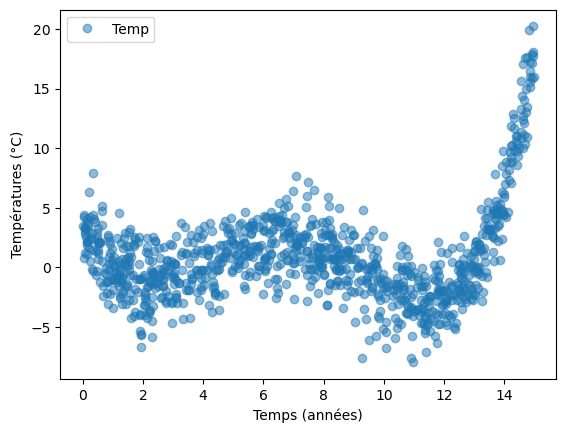

In [8]:
plt.plot(x, y, 'o', alpha = 0.5)
plt.xlabel("Temps (années)")
plt.ylabel("Températures (°C)")
plt.legend(['Temp'])
plt.show()

(Exemple de graphique attendu)

![](figure1.png)

Ce jeu de données nous donne l'évolution de la température au cours du temps depuis ces quinze dernières années. Le but est de mettre en place un modèle de Machine Learning capable de prédire la valeur de la température en fonction de la date.

## Coefficient de corrélation

Calculer le coefficient de corrélation entre `x`et `y`.

In [11]:
rho = np.corrcoef(x, y)[0, 1]
print(" coefficient de corrélation: ",rho)
# Autre facon de le calculer en utilisant pandas
k = pd.DataFrame()
k['x'] = x
k['y'] = y
print("Pearson: ", np.array(k.corr(method = "pearson"))[0, 1])
print("Spearman: ", np.array(k.corr(method = "spearman"))[0, 1])
print("Kendall: ", np.array(k.corr(method='kendall'))[0, 1])

 coefficient de corrélation:  0.23347168720042524
Pearson:  0.23347168720042558
Spearman:  0.0677098517098517
Kendall:  0.041465465465465465


Ce coefficient de corrélation est faible, indiquant qu'une régression linéaire simple n'est certainement pas le modèle adéquat pour lier `y` à `x`. Nous allons toutefois voir que malgré ce faible coefficient de corrélation, il est possible de relier mathématiquement `y` et `x` en utilisant ici la régression polynomiale.

# Interpolation des données par une régression polynomiale

Effectuer une régression polynomiale sur l'ensemble du jeu de données (`x`, `y`) en utilisant la librairie `scikit-learn`. Tester différentes valeurs de degrés de polynômes et calculer les erreurs quadratiques moyennes associées ainsi que leurs racines carrées. Afficher sur un graphique les prédictions obtenues.

## Régression polynomiale

In [36]:
d = 4 # degré du polynome
poly = PolynomialFeatures(d)
X_poly = poly.fit_transform(x.reshape(-1, 1))
print(X_poly[0:5, :])
print(x[0:5].reshape(-1, 1))
print(x[0:5])

[[1.00000000e+00 6.01123004e+00 3.61348866e+01 2.17215116e+02
  1.30573003e+03]
 [1.00000000e+00 6.04613137e+00 3.65557045e+01 2.21020592e+02
  1.33631953e+03]
 [1.00000000e+00 3.79930453e+00 1.44347149e+01 5.48418778e+01
  2.08360995e+02]
 [1.00000000e+00 7.60257675e+00 5.77991732e+01 4.39422650e+02
  3.34074442e+03]
 [1.00000000e+00 2.76840237e+00 7.66405170e+00 2.12171789e+01
  5.87376885e+01]]
[[6.01123004]
 [6.04613137]
 [3.79930453]
 [7.60257675]
 [2.76840237]]
[6.01123004 6.04613137 3.79930453 7.60257675 2.76840237]


In [65]:
model = LinearRegression()
model.fit(X_poly, y) # entrainement du modèle, trouver les paramètres 
y_predict = model.predict(X_poly) # la prédiction

# Utiliser un pipeline = Transformer + Estimateur

In [38]:
# make pipeline
pipe = [('polynomial', PolynomialFeatures(d)), ('model', LinearRegression())]
pipeline = Pipeline(pipe)
pipeline.fit(x.reshape(-1, 1), y)
y_predict = pipeline.predict(x.reshape(-1, 1))

## Erreur quadratique moyenne

In [39]:
MSE = mean_squared_error(y, y_predict) #(y-ypredict)^2
print(" MSE : ", MSE)
print(" RMSE : ", MSE**0.5)

 MSE :  3.748852466975713
 RMSE :  1.9361953586804492


## Affichage

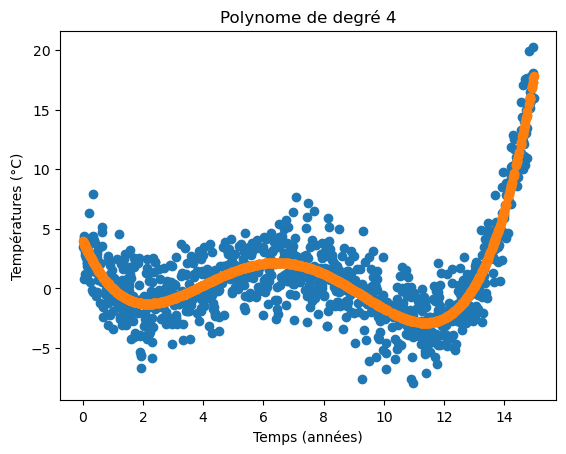

In [43]:
plt.scatter(x, y)
plt.title('Polynome de degré {}'.format(d))
plt.scatter(x, y_predict)
plt.xlabel("Temps (années)")
plt.ylabel("Températures (°C)")
plt.show()

(Exemple de graphique attendu)

![](figure2.png)

## Ensuite...

Calculer la valeur du degré `d` (1 < `d` < 20) du polynôme minimisant l'erreur quadratique moyenne.

In [62]:
min_MSE = np.inf # fixe la valeur minimale à +infini

def degre_polynome(val_MSE, x, y, x_val, y_val):
    for d in range(1, 21):
        pipe = [('polynomial', PolynomialFeatures(d)), ('model', LinearRegression())]
        pipeline = Pipeline(pipe)
        pipeline.fit(x.reshape(-1, 1), y)
        y_predict = pipeline.predict(x_val.reshape(-1, 1))
        MSE = mean_squared_error(y_val, y_predict)
        if MSE < val_MSE:
            val_MSE = MSE
            print(val_MSE, d)
            degree = d
    return degree
d = degre_polynome(min_MSE, x, y, x, y)

14.791121461024373 1
12.642981410845023 2
9.022474967655615 3
3.748852466975713 4
3.7340972344564882 5
3.733754894770692 6
3.733529819720949 7
3.733464934684202 8
3.733357966082847 9
3.73008371643599 10
3.729898347493689 11


Vous avez dû identifier un polynôme de degré 11 comme étant celui qui minimise au mieux l'erreur quadratique moyenne. Toutefois en réalité, les variables `x`et `y` sont reliées entre elles par un polynôme de degré 4. Nous faisons ici face à un problème traditionnel en traitement de la donnée, le sur-apprentissage ou "overfitting". Nous allons voir dans la section précédente une méthode pour s'en affranchir.
### ajouter des visuels pour expliquer le overfitting

# Approche Machine Learning

Un modèle de Machine Learning est typiquement défini par :
* des paramètres ;
* des hyper-paramètres.

Un modèle polynomial a plusieurs paramètres : les coefficients du polynôme $\theta_{0}, \theta_{1}, \ldots, \theta_{d}$. Il n'a par contre qu'un seul hyperparamètre, le degré $d$ du polynôme.

Vous allez dans cette section apprendre, sur l'exemple de la régression polynomiale, comment dans un projet de Machine Learning le jeu de données est échantillonné afin :
* de calculer les paramètres du modèle ;
* d'optimiser les hyperparamèters du modèle ;
* d'éviter le phénomène de sur-apprentissage.

## Echantillonnage des données

Créer trois jeu de données :
* le jeu d'apprentissage constitué de 60% des données ;
* le jeu de validation constitué de 20% des données ;
* le jeu de test consituté de 20% des données.

Fixer la variable `random_state` à 42 pour que nous puissions tous comparer nos résultats.

In [49]:
x_train_val, x_test, y_train_val, y_test     = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_val, y_train_val, 
                                                                train_size = 0.75, random_state = 42)

In [50]:
print(x_test.shape) # (200,)

(200,)


In [53]:
print(y_test.shape) # (200,)

(200,)


In [54]:
print(x_train.shape) # (600,)

(600,)


In [55]:
print(y_train.shape) # (600,)

(600,)


In [56]:
print(x_validation.shape) #(200,)

(200,)


In [57]:
print(y_validation.shape) #(200,)

(200,)


Afficher sur un graphique les trois jeux de données. On affiche les jeux de données pour vérifier qu'ils sont répartis de la même manière.

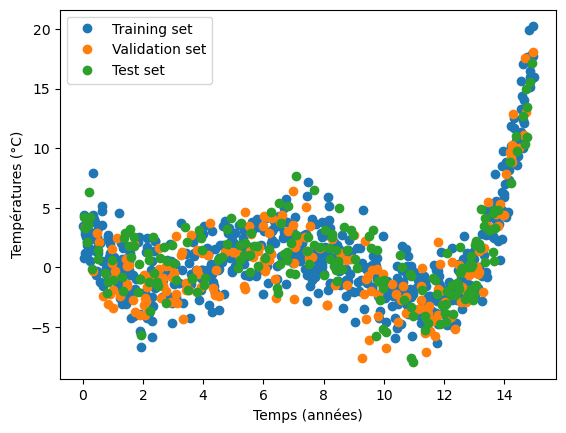

In [58]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_validation, y_validation, 'o')
plt.plot(x_test, y_test, 'o')
plt.legend(['Training set', 'Validation set', 'Test set'])
plt.xlabel("Temps (années)")
plt.ylabel("Températures (°C)")
plt.show()

(Exemple de graphique attendu)

![](figure3.png)

# Entrainement du modèle

Calculer la valeur du degré `d` du polynôme qui minimise l'erreur quadratique moyenne.

Pour cela, nous allons tester 20 valeurs de degré `d` ($0 < d < 21$).

Commencer par affecter la valeur 1 à la variable `d`. Effectuer une régression polynomiale sur le jeu d'apprentissage. Calculer l'erreur quadratique moyenne obtenue sur le jeu de validation. Répéter l'opération pour $d = 2, d = 3, \ldots, d = 20$. 

La valeur du degré `d` du polynôme qui donne l'erreur quadratique moyenne la plus faible sur le jeu de validation est celle à retenir. (Vous le savez déjà, la bonne réponse est $d = 4$.) Le Jeu de validation permet de calculer les hyperparamètres(ici le degré du polynome) et le jeu de train permet de calculer les paramètres.

In [64]:
min_validation_MSE = np.inf
d = degre_polynome(min_validation_MSE, x_train, y_train, x_validation, y_validation)
print(d)

15.11338358855628 1
13.815259491549643 2
9.43452776781417 3
4.15858732921039 4
4
(1000,)


Affecter la valeur 4 à la variable `d`. Effectuer une régression polynomiale sur le jeu d'apprentissage. Calculer l'erreur quadratique moyenne sur le jeu de validation. Afficher l'erreur quadratique moyenne et sa racine carrée.

In [76]:
d = 4
pipe = [('polynomial', PolynomialFeatures(d)), ('model', LinearRegression())]
pipeline = Pipeline(pipe)
pipeline.fit(x_train.reshape(-1, 1), y_train)
y_predict_train = pipeline.predict(x_train.reshape(-1, 1))

Extraire du modèle entrainé les coefficients du polynôme.

In [77]:
time = np.linspace(0, 15, num=31)

theta0 = pipeline.steps[1][1].intercept_
print(theta0)

theta1 = pipeline.steps[1][1].coef_[1]
theta2 = pipeline.steps[1][1].coef_[2]
theta3 = pipeline.steps[1][1].coef_[3]
theta4 = pipeline.steps[1][1].coef_[4]

polynomial = theta0 + theta1*time + theta2*time**2 + theta3*time**3 + theta4*time**4

4.158698216436715


## Données d'apprentissage : affichage des résultats

Calculer l'erreur quadratique moyenne et sa racine carrée obtenues sur les données d'apprentissage.

In [78]:
train_MSE = mean_squared_error(y_train, y_predict_train)
train_RMSE = train_MSE**0.5

Afficher sur un graphique les données d'apprentissage et la régression polynomiale obtenue.

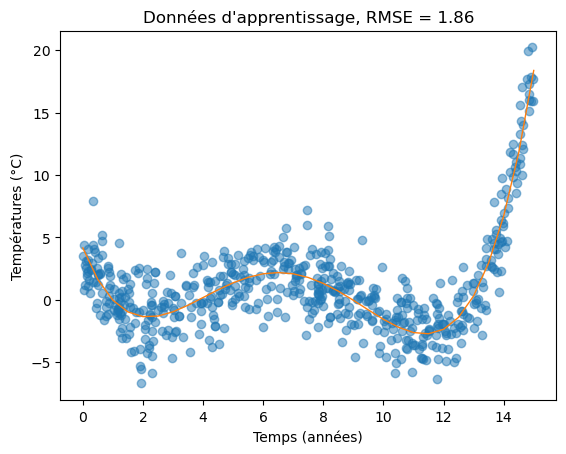

In [82]:
plt.plot(x_train, y_train, 'o', alpha = 0.5)
plt.plot(time, polynomial, lw = 1)
plt.title("Données d'apprentissage, RMSE = {:.3}".format(train_RMSE))
plt.xlabel("Temps (années)")
plt.ylabel("Températures (°C)")
plt.show()

(Exemple de graphique attendu)

![](figure4.png)

## Données de validation : affichage des résultats

Calculer l'erreur quadratique moyenne et sa racine carrée obtenues sur les données de validation.

In [83]:
y_predict_validation = pipeline.predict(x_validation.reshape(-1, 1))
validation_MSE = mean_squared_error(y_predict_validation, y_validation)
validation_RMSE = validation_MSE**0.5

Afficher sur un graphique les données de validation et la régression polynomiale obtenue.

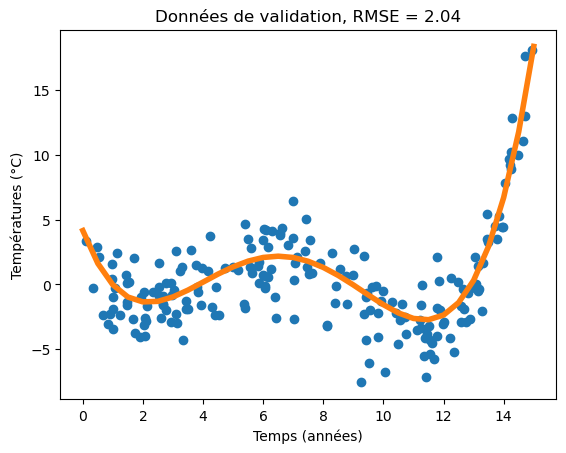

In [85]:
plt.plot(x_validation, y_validation, 'o')
plt.plot(time, polynomial, lw = 4)
plt.title("Données de validation, RMSE = {:.3}".format(validation_RMSE))
plt.xlabel("Temps (années)")
plt.ylabel("Températures (°C)")
plt.show()

(Exemple de graphique attendu)

![](figure5.png)

# Données de test : évaluation des performances

Calculer l'erreur quadratique moyenne et sa racine carrée obtenues sur les données de test.

In [86]:
y_predict_test = pipeline.predict(x_test.reshape(-1, 1))
test_MSE  = mean_squared_error(y_predict_test, y_test)
test_RMSE = test_MSE**0.5

Afficher sur un graphique les données de test et la régression polynomiale obtenue.

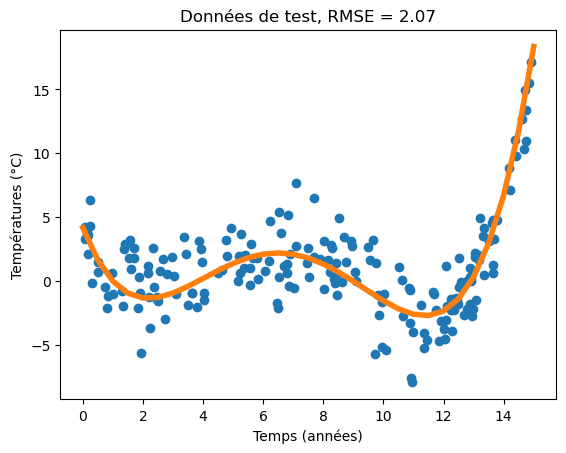

In [87]:
plt.plot(x_test, y_test, 'o')
plt.plot(time, polynomial, lw = 4)
plt.title("Données de test, RMSE = {:.3}".format(test_RMSE))
plt.xlabel("Temps (années)")
plt.ylabel("Températures (°C)")
plt.show()

(Exemple de graphique attendu)

![](figure6.png)

Effectuer une régression linéaire entre les données de test réelles et les données de test prédites (utiliser Numpy). Calculer la pente `a`, l'ordonnée à l'origine `b` et le coefficient de détermination `R²`.

In [89]:
[a, b] = np.polyfit(y_test, y_predict_test, 1)
corr_pearson = np.corrcoef(y_test, y_predict_test)
R2 = corr_pearson[0, 1]**2

Afficher sur un graphique les températures prédites en fonction des températures réelles (données de test). Afficher en plus la droite de régression, son équation ainsi que le coefficient de détermination.

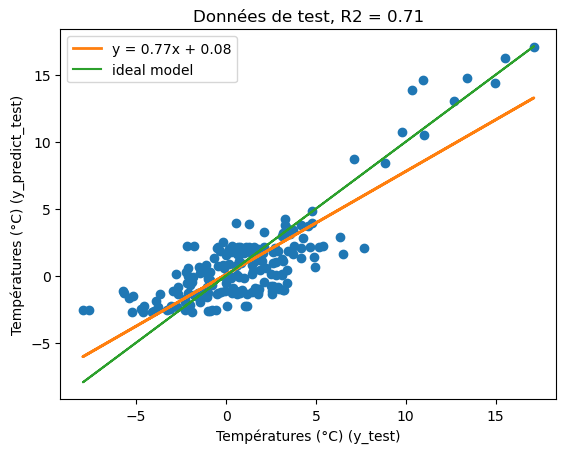

In [91]:
plt.plot(y_test, y_predict_test, 'or', alpha = 0.5)
plt.plot(y_test, a*y_test + b, lw = 2, label= "y = {:.3}x + {:.1}".format(a, b))
plt.plot(y_test, y_test, label= 'ideal model')
plt.title("Données de test, R2 = {:.2}".format(R2))
plt.xlabel("Températures (°C) (y_test)")
plt.ylabel("Températures (°C) (y_predict_test)")
plt.legend()
plt.show()

(Exemple de graphique attentu)

![](figure7.png)